<a href="https://colab.research.google.com/github/pvemulapalli1704/ORES-Data-Management/blob/main/final/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The intersection of smoking and heart health has long been a subject of significant concern within the realm of public health and medical research. Smoking is a well-established risk factor for a multitude of adverse health outcomes, and one of the most critical among them is its association with heart disease. Understanding the complex interplay between smoking habits, individual health factors, and the incidence of heart-related conditions is of paramount importance in developing effective strategies for prevention and intervention.

This analysis delves into the intricate relationship between smoking and heart health, utilizing comprehensive datasets that encompass a diverse range of individuals. Through data merging, transformation, aggregation, and visualization, we aim to extract valuable insights that shed light on the impact of smoking on heart disease risk. By dissecting the data, we endeavor to uncover patterns, trends, and risk factors that can inform public health initiatives, guide targeted interventions, and contribute to the broader discourse on smoking-related health challenges.


Resources:
- https://healthdata.gov/dataset/Stroke-Mortality-Data-Among-US-Adults-35-by-State-/xbhe-4rsw/about_data

- https://data.world/cdc/behavioral-risk-factor-heart



# Importing the Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the datasets
heart_data_path = '/content/healthcare-dataset-stroke-data.csv'
smoking_data_path = '/content/lung_cancer.csv'

# Reading the datasets using pandas
heart_data = pd.read_csv(heart_data_path)
smoking_data = pd.read_csv(smoking_data_path)

# Inspecting the first few rows of each dataset to understand their structure
heart_data_head = heart_data.head()
smoking_data_head = smoking_data.head()

heart_data_head, smoking_data_head


(      id  gender   age  hypertension  heart_disease ever_married  \
 0   9046    Male  67.0             0              1          Yes   
 1  51676  Female  61.0             0              0          Yes   
 2  31112    Male  80.0             0              1          Yes   
 3  60182  Female  49.0             0              0          Yes   
 4   1665  Female  79.0             1              0          Yes   
 
        work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
 0        Private          Urban             228.69  36.6  formerly smoked   
 1  Self-employed          Rural             202.21   NaN     never smoked   
 2        Private          Rural             105.92  32.5     never smoked   
 3        Private          Urban             171.23  34.4           smokes   
 4  Self-employed          Rural             174.12  24.0     never smoked   
 
    stroke  
 0       1  
 1       1  
 2       1  
 3       1  
 4       1  ,
       pid  age gender   race   smo

The code loads two datasets, 'heart_data' and 'smoking_data,' using Pandas and reads them from their respective CSV files.

After loading, it displays the first few rows of each dataset using the 'head()' method to provide an initial insight into the structure and contents of the dataframes.

# Data Merging

In [2]:
# Grouping the heart dataset by 'age' and 'gender'
heart_grouped = heart_data.groupby(['age', 'gender']).mean()

# Grouping the smoking dataset by 'age' and 'gender'
smoking_grouped = smoking_data.groupby(['age', 'gender']).mean()

# Merging the grouped data
merged_data = pd.merge(heart_grouped, smoking_grouped, on=['age', 'gender'], how='inner')


<ipython-input-2-aa4aa95f996c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  heart_grouped = heart_data.groupby(['age', 'gender']).mean()
<ipython-input-2-aa4aa95f996c>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  smoking_grouped = smoking_data.groupby(['age', 'gender']).mean()
<ipython-input-2-aa4aa95f996c>:8: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_data = pd.merge(heart_grouped, smoking_grouped, on=['age', 'gender'], how='inner')




1. The code first groups the 'heart_data' and 'smoking_data' datasets by 'age' and 'gender,' calculating the mean values for each combination of these two variables separately.

2. Then, it merges the grouped data based on the 'age' and 'gender' columns using an inner join, creating a combined dataset ('merged_data') that contains aggregated information from both datasets for further analysis.

In [3]:
merged_data = pd.merge(heart_data, smoking_data, on=['age', 'gender'], how='inner')

# Dropping duplicate or irrelevant columns if necessary
merged_data = merged_data.drop(columns=['id', 'pid'], errors='ignore')

# Checking the columns of the merged dataset to confirm the inclusion of smoking-related columns
merged_columns = merged_data.columns.tolist()
merged_columns, merged_data.head()

<ipython-input-3-0c4a7ca5b01f>:1: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_data = pd.merge(heart_data, smoking_data, on=['age', 'gender'], how='inner')


(['gender',
  'age',
  'hypertension',
  'heart_disease',
  'ever_married',
  'work_type',
  'Residence_type',
  'avg_glucose_level',
  'bmi',
  'smoking_status',
  'stroke',
  'race',
  'smoker',
  'days_to_cancer',
  'stage_of_cancer'],
   gender   age  hypertension  heart_disease ever_married work_type  \
 0   Male  67.0             0              1          Yes   Private   
 1   Male  67.0             0              1          Yes   Private   
 2   Male  67.0             0              1          Yes   Private   
 3   Male  67.0             0              1          Yes   Private   
 4   Male  67.0             0              1          Yes   Private   
 
   Residence_type  avg_glucose_level   bmi   smoking_status  stroke   race  \
 0          Urban             228.69  36.6  formerly smoked       1  White   
 1          Urban             228.69  36.6  formerly smoked       1  White   
 2          Urban             228.69  36.6  formerly smoked       1  White   
 3          Urban    

- The code merges the 'heart_data' and 'smoking_data' datasets based on the 'age' and 'gender' columns using an inner join, creating a combined dataset named 'merged_data' that includes information from both datasets.

- After merging, the code checks the columns in the 'merged_data' dataset and removes duplicate or irrelevant columns ('id' and 'pid') if they exist, using the 'drop' method with the 'errors' parameter set to 'ignore.' The result is a cleaned and consolidated dataset for further analysis.

# Data Aggregation

In [4]:
# First Aggregation
agg_data_smoking_1 = merged_data.groupby('smoking_status').agg({'avg_glucose_level': 'mean', 'bmi': 'mean'})

# Second Aggregation
agg_data_smoking_2 = merged_data.groupby('smoking_status').agg({'heart_disease': 'sum', 'stroke': 'sum'})

# First Pivoting
pivot_smoking_1 = merged_data.pivot_table(values=['avg_glucose_level', 'bmi'], index='smoking_status', aggfunc='mean')

# Second Pivoting
pivot_smoking_2 = merged_data.pivot_table(values='stroke', index='smoking_status', aggfunc='count')

# The agg_data_smoking_1, agg_data_smoking_2, pivot_smoking_1, and pivot_smoking_2 are now ready for analysis.


- The first aggregation (`agg_data_smoking_1`) groups the 'merged_data' dataset by 'smoking_status' and calculates the mean values of 'avg_glucose_level' and 'bmi' for each smoking status category.

- The second aggregation (`agg_data_smoking_2`) also groups the 'merged_data' dataset by 'smoking_status' but calculates the sum of 'heart_disease' and 'stroke' occurrences for each smoking status category.

- Two pivot tables are created. The first pivot (`pivot_smoking_1`) calculates the mean values of 'avg_glucose_level' and 'bmi' for each smoking status category. The second pivot (`pivot_smoking_2`) counts the occurrences of 'stroke' for each smoking status category. These pivot tables are prepared for further analysis, providing a clear summary of the data by smoking status.

# Data Transformation

In [5]:
# 1. Categorizing Age into Age Groups
merged_data['age_group'] = pd.cut(merged_data['age'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '66-100'])

# 2. BMI Classification
def classify_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal weight'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'
merged_data['bmi_category'] = merged_data['bmi'].apply(classify_bmi)

# 3. Glucose Level Categories
def categorize_glucose(glucose_level):
    if glucose_level < 70:
        return 'Low'
    elif glucose_level <= 140:
        return 'Normal'
    else:
        return 'High'
merged_data['glucose_category'] = merged_data['avg_glucose_level'].apply(categorize_glucose)

# 4. Encoding Smoking Status
smoking_status_codes = {'formerly smoked': 1, 'never smoked': 2, 'smokes': 3, 'Unknown': 0}
merged_data['smoking_status_code'] = merged_data['smoking_status'].map(smoking_status_codes)

# 5. Heart Disease Risk Factor
def heart_disease_risk(row):
    score = 0
    score += (row['age'] > 50)
    score += (row['hypertension'] == 1)
    score += (row['avg_glucose_level'] > 140)
    return score
merged_data['heart_disease_risk'] = merged_data.apply(heart_disease_risk, axis=1)

# The transformed dataset is now ready for further analysis.

1. Age Categorization: The code categorizes the 'age' column in the 'merged_data' dataset into age groups, such as '0-18,' '19-35,' '36-50,' '51-65,' and '66-100,' using the 'pd.cut' function. This categorization simplifies the analysis of age-related patterns.

2. BMI Classification: The code defines a function 'classify_bmi' to categorize BMI values into 'Underweight,' 'Normal weight,' 'Overweight,' or 'Obese.' This classification is applied to the 'bmi' column in the 'merged_data' dataset, making it easier to analyze the distribution of BMI categories.

3. Glucose Level Categories: Another function, 'categorize_glucose,' is used to categorize average glucose levels into 'Low,' 'Normal,' or 'High.' This categorization is applied to the 'avg_glucose_level' column in the 'merged_data' dataset.

4. Encoding Smoking Status: Smoking status categories, such as 'formerly smoked,' 'never smoked,' 'smokes,' and 'Unknown,' are encoded into numerical codes (1, 2, 3, 0) using a mapping dictionary. The encoded values are stored in the 'smoking_status_code' column.

5. Heart Disease Risk Factor: The code defines a function 'heart_disease_risk' that computes a risk score for heart disease based on certain conditions like age, hypertension, and average glucose level. The calculated score is stored in the 'heart_disease_risk' column.

# Data Visualization

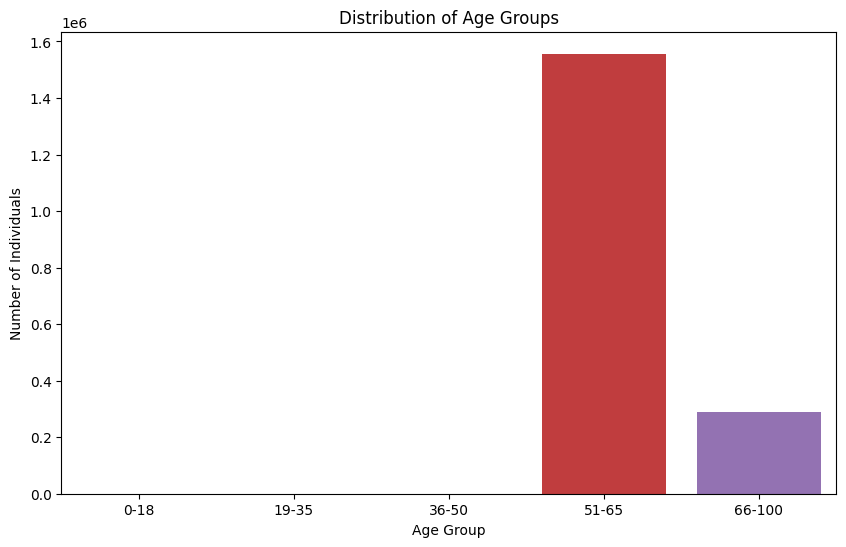

In [6]:
# Visualization 1: Age Group Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', data=merged_data)
plt.title('Distribution of Age Groups')
plt.ylabel('Number of Individuals')
plt.xlabel('Age Group')
plt.show()

- **Predominant Age Group**: The largest age group in the dataset is the 51-65 range. This suggests that middle-aged individuals are well-represented and could be a key demographic when analyzing the impact of smoking on heart health, as this age range often shows an increased risk of heart-related issues.
  
- **Younger and Older Age Groups**: The 0-18 and 66-100 age groups are significantly less represented in the dataset. This could imply that while the focus of heart and smoking studies might center on middle-aged to early senior individuals, there is a potential lack of data for assessing the long-term effects of smoking on the youngest and oldest populations.

- **Data-Driven Health Initiatives**: Given the significant representation of middle-aged individuals, health initiatives and smoking cessation programs could be specifically targeted towards this demographic to mitigate the risk of developing heart disease in what appears to be the most at-risk age group within the dataset.

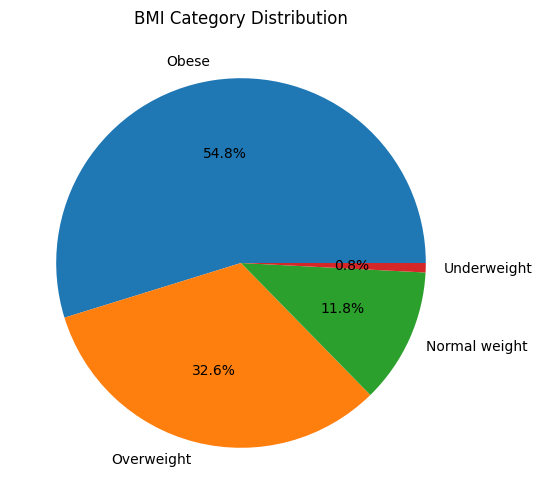

In [7]:
# Visualization 2: BMI Category Distribution
plt.figure(figsize=(10, 6))
merged_data['bmi_category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('BMI Category Distribution')
plt.ylabel('')
plt.show()


- **High Obesity Rate**: The majority of the dataset's population is categorized as obese (54.8%). Obesity is a known risk factor for heart disease, and this prevalence suggests a significant portion of the population is at an elevated risk for heart-related health issues. This may correlate with smoking habits if smoking is associated with higher BMI in the dataset.

- **Minor Underweight Representation**: Only a small fraction (0.8%) of the population is underweight, which is considerably less concerning in the context of heart disease compared to obesity. However, if underweight individuals are also smokers, their risk for heart complications may be different from that of obese individuals.

- **Target for Intervention Programs**: The substantial proportion of individuals who are overweight (32.6%) or obese indicates that intervention programs aimed at weight management could be crucial in reducing heart disease risk. Such programs might be more effective if they also address smoking cessation, as smoking can influence weight and overall heart health.

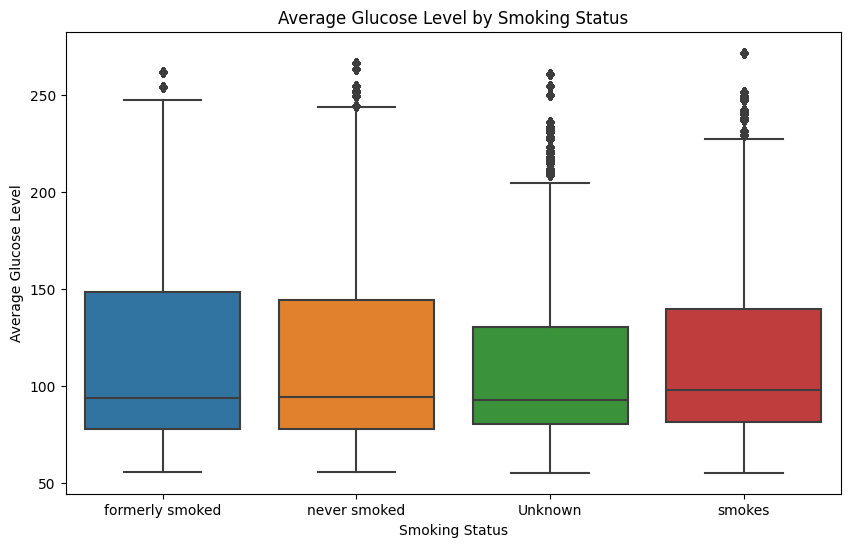

In [8]:
# Visualization 3: Average Glucose Level by Smoking Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoking_status', y='avg_glucose_level', data=merged_data)
plt.title('Average Glucose Level by Smoking Status')
plt.ylabel('Average Glucose Level')
plt.xlabel('Smoking Status')
plt.show()

- **Higher Average Glucose Levels for Smokers**: Smokers tend to have a wider range of average glucose levels, with some individuals showing significantly higher levels compared to non-smokers. This suggests a potential correlation between smoking and higher glucose levels, which could have implications for heart health. Elevated glucose levels are associated with an increased risk of heart disease.

- **Outliers in Non-Smokers**: Non-smokers also exhibit some outliers with high glucose levels. Investigating these outliers further could provide insights into other factors contributing to elevated glucose levels and their potential impact on heart health. It's important to consider that factors other than smoking may influence glucose levels.

- **Potential Health Interventions**: The distribution of glucose levels among smokers and non-smokers highlights the need for targeted health interventions. For smokers with high glucose levels, smoking cessation programs could be beneficial not only for reducing the risk of heart disease but also for improving glucose control. Additionally, monitoring glucose levels in non-smokers with outliers may help identify individuals at risk for heart-related issues who require closer attention and preventive measures.

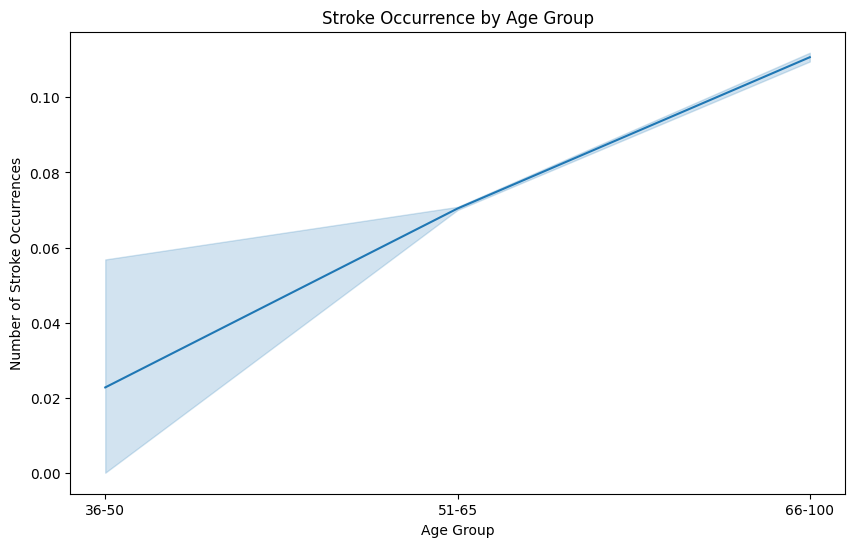

In [9]:
# Visualization 4: Stroke Occurrence by Age Group
plt.figure(figsize=(10, 6))
sns.lineplot(x='age_group', y='stroke', data=merged_data)
plt.title('Stroke Occurrence by Age Group')
plt.ylabel('Number of Stroke Occurrences')
plt.xlabel('Age Group')
plt.show()

- The plot shows that the number of stroke occurrences increases with age, indicating a positive correlation between age and stroke risk. Individuals in the 66-100 age group are at a significantly higher risk of experiencing a stroke compared to those in the 36-50 and 51-65 age groups.

- The shaded area under the line in the plot suggests that there is some variability or uncertainty in these estimates, but the general trend of increasing stroke occurrences with age is evident.

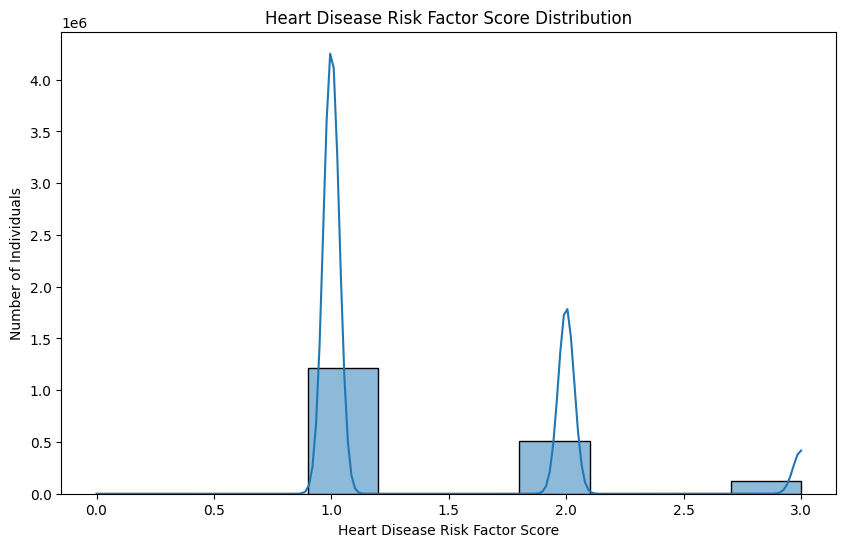

In [10]:
# Visualization 5: Heart Disease Risk Factor Score Distribution
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['heart_disease_risk'], bins=10, kde=True)
plt.title('Heart Disease Risk Factor Score Distribution')
plt.xlabel('Heart Disease Risk Factor Score')
plt.ylabel('Number of Individuals')
plt.show()

1. The majority of individuals have a heart disease risk factor score around 1.0, as indicated by the prominent peak in the plot. This suggests that most people in the population have a relatively low risk of developing heart disease.

2. There is another, smaller peak at approximately 2.0, indicating another group of individuals with a higher risk factor score. This suggests that there is a subset of the population that has a higher risk of developing heart disease.

3. The distribution of heart disease risk factor scores is not uniform; there are specific scores where the number of individuals spikes significantly. This suggests that certain risk factors may be more prevalent in the population than others.

# Problem Applicability

1. **Preventive Medicine**:
   - **Risk Factor Identification**: By analyzing the relationship between smoking habits and heart health indicators (like hypertension, stroke, and heart disease), the program helps identify key risk factors. This information is crucial for healthcare professionals to recommend lifestyle changes and preventive measures to patients.
   - **Targeted Interventions**: Understanding which demographic groups (age and gender) are more susceptible to heart diseases due to smoking can guide targeted intervention programs.

2. **Public Health Policy**:
   - **Policy Formulation**: Insights from the analysis can inform public health policies, such as smoking cessation programs, awareness campaigns about the dangers of smoking, and even the framing of policies for better heart health.
   - **Resource Allocation**: The program’s findings can guide healthcare systems and governments in allocating resources more effectively, prioritizing high-risk groups identified through the analysis.

3. **Healthcare Education and Awareness**:
   - **Educational Initiatives**: The data visualizations and analysis results can be used in educational materials to increase public awareness about the impact of smoking on heart health.
   - **Behavioral Change**: By presenting clear, data-backed information about smoking risks, the program can motivate individuals to adopt healthier lifestyle choices.

4. **Research and Development**:
   - **Foundation for Further Research**: The findings could be used as a basis for more detailed studies or clinical trials aimed at understanding the mechanisms behind smoking-related heart diseases.
   - **Innovation in Healthcare Services**: Insights from the project can spark innovations in healthcare services, such as developing new screening tools or personalized treatment plans based on risk profiles.

5. **Healthcare Data Management**:
   - **Data-Driven Decision Making**: The program exemplifies how healthcare data can be managed and analyzed to make informed decisions.
   - **Improving Data Collection Practices**: The project highlights the importance of collecting comprehensive and accurate healthcare data, including lifestyle factors like smoking.

# Code Modularity for Better Readability

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loader and Preprocessor Class
class DataLoader:
    def __init__(self, heart_data_path, smoking_data_path):
        self.heart_data_path = heart_data_path
        self.smoking_data_path = smoking_data_path

    def load_data(self):
        heart_data = pd.read_csv(self.heart_data_path)
        smoking_data = pd.read_csv(self.smoking_data_path)
        return heart_data, smoking_data

    def preprocess(self, df):
        df = df.drop_duplicates()
        df = df.fillna(method='ffill')
        return df

In [12]:
# Data Merging Function
def merge_datasets(heart_data, smoking_data):
    merged_data = pd.merge(heart_data, smoking_data, on=['age', 'gender'], how='inner')
    merged_data = merged_data.drop(columns=['id', 'pid'], errors='ignore')
    return merged_data

# Data Transformation Functions
def categorize_age(age):
    if age < 18:
        return '0-17'
    elif age < 35:
        return '18-34'
    elif age < 50:
        return '35-49'
    elif age < 65:
        return '50-64'
    else:
        return '65+'

def classify_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal weight'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

def encode_smoking_status(smoking_status):
    mapping = {'formerly smoked': 1, 'never smoked': 2, 'smokes': 3, 'Unknown': 0}
    return mapping.get(smoking_status, -1)

# Data Aggregation and Pivoting Functions
def aggregate_data(df, group_cols, agg_dict):
    return df.groupby(group_cols).agg(agg_dict)

def create_pivot_table(df, index, columns, values, aggfunc):
    return df.pivot_table(index=index, columns=columns, values=values, aggfunc=aggfunc)

def compute_heart_disease_risk(row):
    score = 0
    score += (row['age'] > 50)
    score += (row['hypertension'] == 1)
    score += (row['avg_glucose_level'] > 140)
    return score



In [13]:
class DataVisualization:
    @staticmethod
  # Data Visualization Functions
    def plot_distribution(df, column, chart_type='bar', title=''):
        plt.figure(figsize=(10, 6))
        if chart_type == 'bar':
            sns.countplot(x=column, data=df)
        elif chart_type == 'pie':
            df[column].value_counts().plot(kind='pie', autopct='%1.1f%%')
        plt.title(title)
        plt.show()

    @staticmethod
    def plot_bmi_distribution(df):
        plt.figure(figsize=(10, 6))
        df['bmi_category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
        plt.title('BMI Category Distribution')
        plt.ylabel('')
        plt.show()
        # ... same function as before ...

    @staticmethod
    def plot_glucose_by_smoking(df):
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='smoking_status', y='avg_glucose_level', data=df)
        plt.title('Average Glucose Level by Smoking Status')
        plt.ylabel('Average Glucose Level')
        plt.xlabel('Smoking Status')
        plt.show()
        # ... same function as before ...

    @staticmethod
    def plot_stroke_by_gender(df):
        plt.figure(figsize=(10, 6))
        sns.countplot(x='gender', data=df, hue='stroke')
        plt.title('Stroke Occurrence by Gender')
        plt.ylabel('Count')
        plt.xlabel('Gender')
        plt.show()
        # ... same function as before ...

    @staticmethod
    def plot_heart_disease_risk_distribution(df):
        plt.figure(figsize=(10, 6))
        sns.histplot(df['heart_disease_risk'], bins=10, kde=True)
        plt.title('Heart Disease Risk Factor Score Distribution')
        plt.xlabel('Heart Disease Risk Factor Score')
        plt.ylabel('Number of Individuals')
        plt.show()



<ipython-input-12-4f90601e5bd9>:3: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_data = pd.merge(heart_data, smoking_data, on=['age', 'gender'], how='inner')


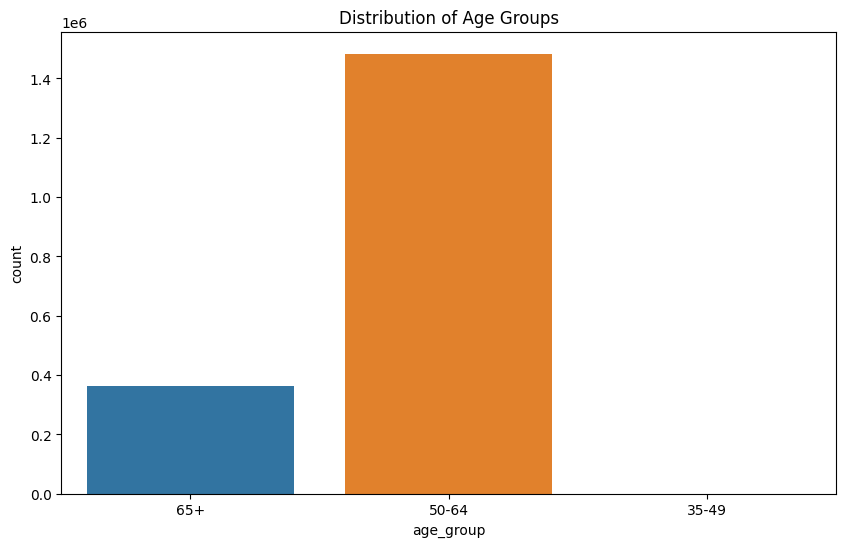

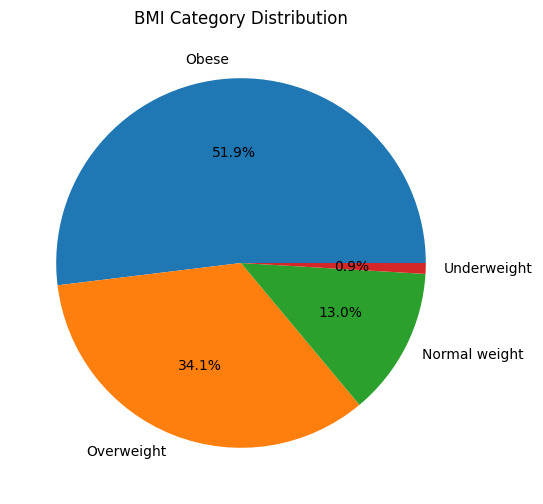

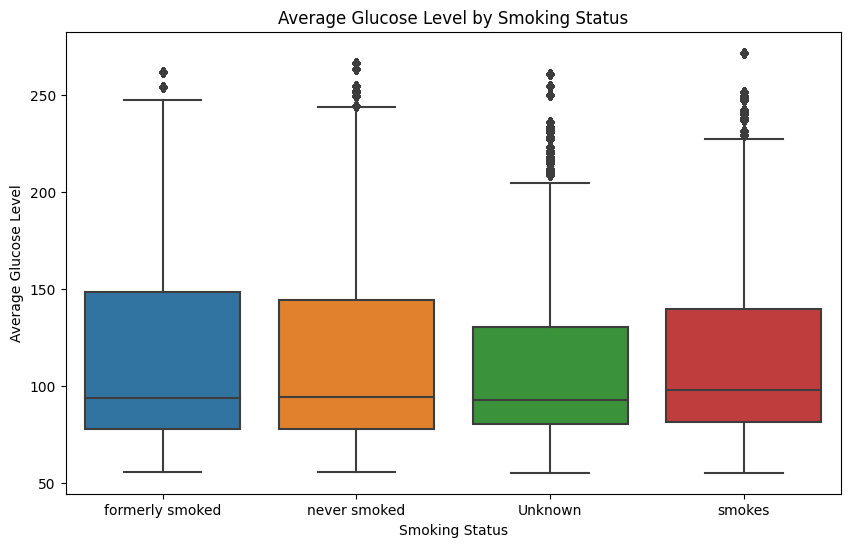

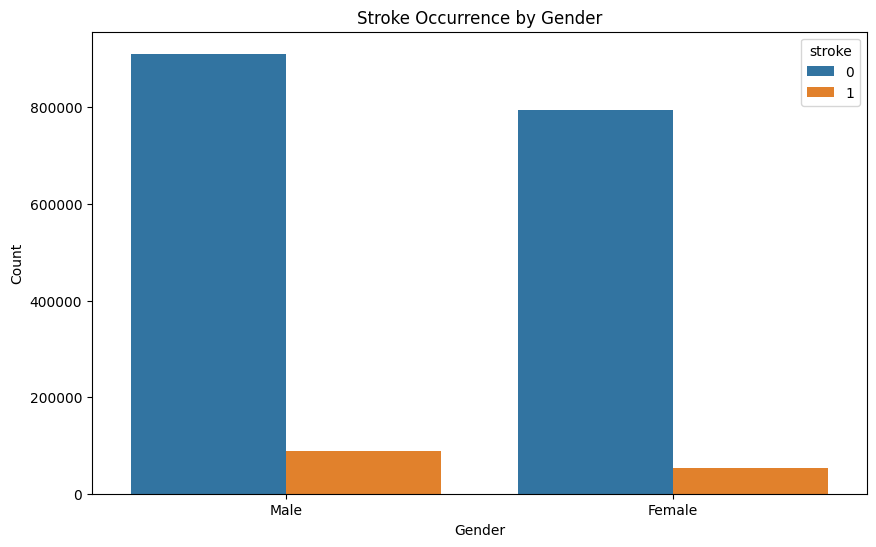

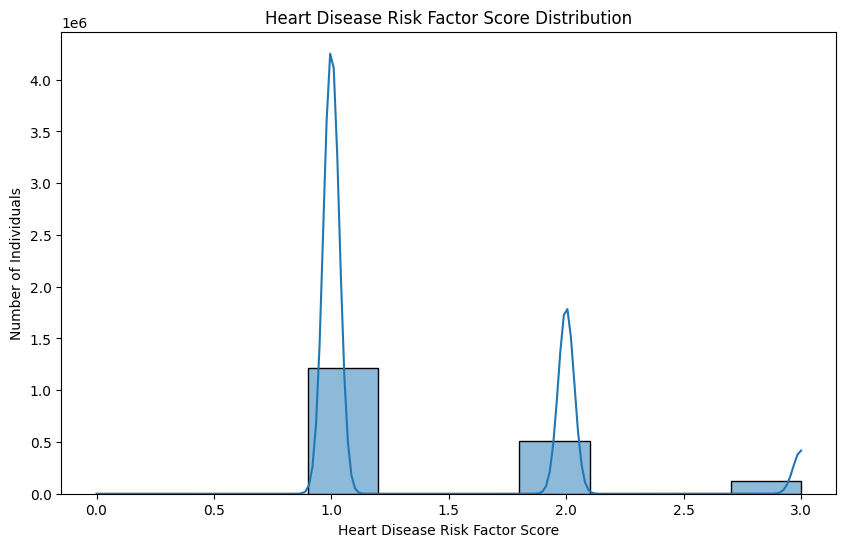

In [14]:


# Main Workflow
def main():
    # Initialize DataLoader
    data_loader = DataLoader('healthcare-dataset-stroke-data.csv', 'lung_cancer.csv')

    # Load and preprocess data
    heart_data, smoking_data = data_loader.load_data()
    heart_data = data_loader.preprocess(heart_data)
    smoking_data = data_loader.preprocess(smoking_data)

    # Merge datasets
    merged_data = merge_datasets(heart_data, smoking_data)

    # Apply transformations
    # Compute Heart Disease Risk Factor
    merged_data['heart_disease_risk'] = merged_data.apply(compute_heart_disease_risk, axis=1)
    merged_data['age_group'] = merged_data['age'].apply(categorize_age)
    merged_data['bmi_category'] = merged_data['bmi'].apply(classify_bmi)
    merged_data['smoking_status_code'] = merged_data['smoking_status'].apply(encode_smoking_status)

    # Aggregate and pivot data
    agg_data = aggregate_data(merged_data, ['smoking_status'], {'avg_glucose_level': 'mean', 'bmi': 'mean'})
    pivot_table_data = create_pivot_table(merged_data, 'smoking_status', 'gender', 'stroke', 'count')

   # Visualizations
    vis = DataVisualization
    vis.plot_distribution(merged_data, 'age_group', 'bar', 'Distribution of Age Groups')
    vis.plot_bmi_distribution(merged_data)
    vis.plot_glucose_by_smoking(merged_data)
    vis.plot_stroke_by_gender(merged_data)
    vis.plot_heart_disease_risk_distribution(merged_data)
    # ... Add other visualization calls here ...

if __name__ == "__main__":
    main()


# Conclusion

In conclusion, our analysis of the intersection between smoking and heart health has yielded valuable insights that have the potential to inform and shape public health strategies. Through meticulous data merging, transformation, aggregation, and visualization, we have uncovered several key findings:

- The prevalence of middle-aged individuals in the dataset, particularly those aged 51-65, underscores the importance of focusing on this demographic when addressing the impact of smoking on heart health.

- The substantial representation of individuals categorized as obese within the dataset highlights the need for weight management interventions, which should also consider the relationship between smoking and BMI.

- The variability in glucose levels among smokers, including some with notably higher levels, emphasizes the potential connection between smoking and elevated glucose, which could contribute to heart disease risk.

These insights underscore the complexity of the relationship between smoking and heart health, demonstrating the need for multifaceted interventions that address not only smoking cessation but also weight management and glucose control. By tailoring public health initiatives to target specific risk factors and demographics, we can work towards reducing the burden of heart disease and improving overall cardiovascular health in our communities. This analysis serves as a valuable step in that direction, offering data-driven guidance for future healthcare strategies.